LSTM networks are special kind of RNN which are explicitly designed to avoid the long term dependency problem. It remebers information for long time.

For this project, based on the stock price data between 2011-2017, we try to predict the stock prices of 2018 using LSTM.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [2]:
#data is from https://finance.yahoo.com/quote/goog/history?ltr=1
data=pd.read_csv('/Users/joonghochoi/Desktop/GOOG.csv')

train, test = train_test_split(data, test_size=0.4)

In [3]:
train.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
111,2021-12-31,145.544006,146.365005,144.677505,144.679504,144.679504,17298000
165,2022-03-21,136.847504,137.582504,134.611496,136.478500,136.478500,26632000
97,2021-12-10,149.100006,149.399994,147.357498,148.675003,148.675003,21634000


In [4]:
training_set = train.iloc[:,1:2].values #open values 
# Feature Scaling
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a data structure with 60 timestamps and 1 output
X_train = []
y_train = []
for i in range(60,train.shape[0]):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# Reshaping
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [7]:
#Model initialization
model = Sequential()

#return_sequences=True : All Hidden States (Hidden State of ALL the time steps)

# Add first LSTM layer
model.add(LSTM(units=50, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))
# Add second LSTM layer
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
# Add third LSTM layer
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
# Add fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))
# Add the output layer
model.add(Dense(units = 1))

In [8]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [9]:
early_stop = EarlyStopping(monitor = 'loss', patience = 10)
#save the Keras model 
checkpoint = ModelCheckpoint('stock_model.h5', monitor = 'loss', save_best_only = True)

In [10]:
model.fit(X_train, y_train, epochs = 50, batch_size = 32, callbacks = [checkpoint, early_stop])


Epoch 1/50
3/3 [==============================] - 18s 68ms/step - loss: 0.4957
Epoch 2/50
3/3 [==============================] - 0s 58ms/step - loss: 0.1989
Epoch 3/50
3/3 [==============================] - 0s 54ms/step - loss: 0.0953
Epoch 4/50
3/3 [==============================] - 0s 53ms/step - loss: 0.0738
Epoch 5/50
3/3 [==============================] - 0s 53ms/step - loss: 0.0843
Epoch 6/50
3/3 [==============================] - 0s 53ms/step - loss: 0.0868
Epoch 7/50
3/3 [==============================] - 0s 64ms/step - loss: 0.0693
Epoch 8/50
3/3 [==============================] - 0s 54ms/step - loss: 0.0865
Epoch 9/50
3/3 [==============================] - 0s 52ms/step - loss: 0.0698
Epoch 10/50
3/3 [==============================] - 0s 52ms/step - loss: 0.0589
Epoch 11/50
3/3 [==============================] - 0s 52ms/step - loss: 0.0731
Epoch 12/50
3/3 [==============================] - 0s 52ms/step - loss: 0.0735
Epoch 13/50
3/3 [==============================] - 0s 56ms/s

In [11]:
real_stock_price = test.iloc[:,1:2].values
all_data = pd.concat((train['Open'], test['Open']), axis = 0)
inputs = all_data[len(all_data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [12]:
X_test = []
for i in range(60,test.shape[0]):
    X_test.append(inputs[i-60:i,0])

#print(len(X_test))
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

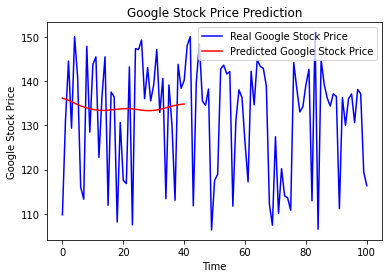

In [13]:
# Visualizing results
plt.plot(real_stock_price, color = 'blue', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

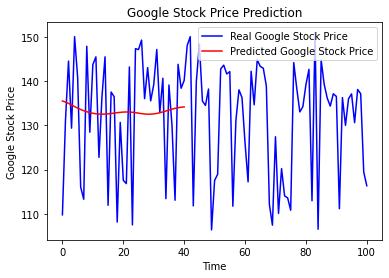

In [15]:
best_model = load_model('stock_model.h5')

predicted_stock_price = best_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualizing results
plt.plot(real_stock_price, color = 'blue', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()